# 1. Import

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

RAND = 10

In [2]:
clientdf = pd.read_csv("client.csv")

# 2. EDA

In [7]:
clientdf

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
0,1,0,108,952.89,0,2021-09-01,2
1,2,0,17,166.40,0,2021-09-01,2
2,3,0,688,7207.88,0,2021-09-01,2
3,0,0,5,400.00,1,2021-09-01,2
4,1,0,43,1411.00,1,2021-09-01,2
...,...,...,...,...,...,...,...
41914,1,15,51,415.60,0,2023-05-29,637
41915,3,15,161,2035.75,0,2023-05-29,637
41916,0,15,15,620.00,1,2023-05-29,637
41917,1,15,20,624.50,1,2023-05-29,637


In [4]:
clientdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41919 entries, 0 to 41918
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_type        41919 non-null  int64  
 1   county              41919 non-null  int64  
 2   eic_count           41919 non-null  int64  
 3   installed_capacity  41919 non-null  float64
 4   is_business         41919 non-null  int64  
 5   date                41919 non-null  object 
 6   data_block_id       41919 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 2.2+ MB


In [5]:
clientdf.describe(include="all")

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
count,41919.000000,41919.000000,41919.000000,41919.000000,41919.000000,41919,41919.000000
unique,NaN,NaN,NaN,NaN,NaN,636,NaN
top,NaN,NaN,NaN,NaN,NaN,2022-11-26,NaN
freq,NaN,NaN,NaN,NaN,NaN,69,NaN
mean,1.898996,7.297097,73.345118,1450.771451,0.536773,NaN,322.898876
std,1.081713,4.780750,144.064389,2422.233120,0.498652,NaN,182.075724
min,0.000000,0.000000,5.000000,5.500000,0.000000,NaN,2.000000
25%,1.000000,3.000000,13.000000,321.900000,0.000000,NaN,167.000000
50%,2.000000,7.000000,32.000000,645.200000,1.000000,NaN,324.000000
75%,3.000000,11.000000,70.000000,1567.150000,1.000000,NaN,480.000000


In [28]:
clientdf = clientdf.astype(
    {
        "county": "uint8",
        "product_type": "uint8",
        "is_business": "bool",
        "date": "datetime64[ns]",
        'eic_count': 'uint16',
    }
)
clientdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41919 entries, 0 to 41918
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   product_type        41919 non-null  uint8         
 1   county              41919 non-null  uint8         
 2   eic_count           41919 non-null  int64         
 3   installed_capacity  41919 non-null  float64       
 4   is_business         41919 non-null  bool          
 5   date                41919 non-null  datetime64[ns]
 6   data_block_id       41919 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), uint8(2)
memory usage: 1.4 MB


In [29]:
clientdf.isnull().sum()

product_type          0
county                0
eic_count             0
installed_capacity    0
is_business           0
date                  0
data_block_id         0
dtype: int64

In [30]:
clientdf[clientdf.duplicated()]

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id


In [32]:
df = clientdf.set_index("date")
df

,product_type,county,eic_count,installed_capacity,is_business,data_block_id
date,,,,,,
2021-09-01,1,0,108,952.89,False,2
2021-09-01,2,0,17,166.40,False,2
2021-09-01,3,0,688,7207.88,False,2
2021-09-01,0,0,5,400.00,True,2
2021-09-01,1,0,43,1411.00,True,2
...,...,...,...,...,...,...
2023-05-29,1,15,51,415.60,False,637
2023-05-29,3,15,161,2035.75,False,637
2023-05-29,0,15,15,620.00,True,637


<Axes: >

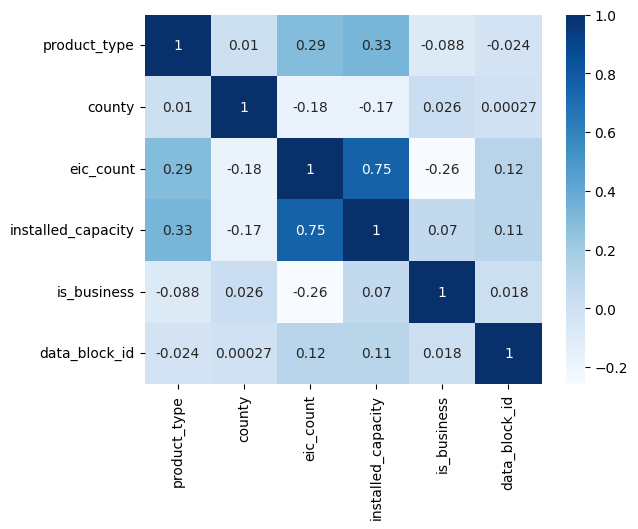

In [37]:
sns.heatmap(df.corr(), annot=True, cmap="Blues")

<Axes: xlabel='date', ylabel='eic_count'>

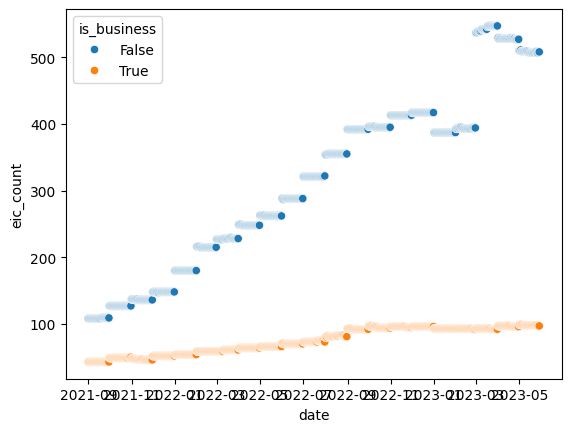

In [49]:
sns.scatterplot(
    data=df.query('county == 0 and product_type == 1'),
    x="date",
    y="eic_count",
    hue="is_business",
    # log_scale=True,
)

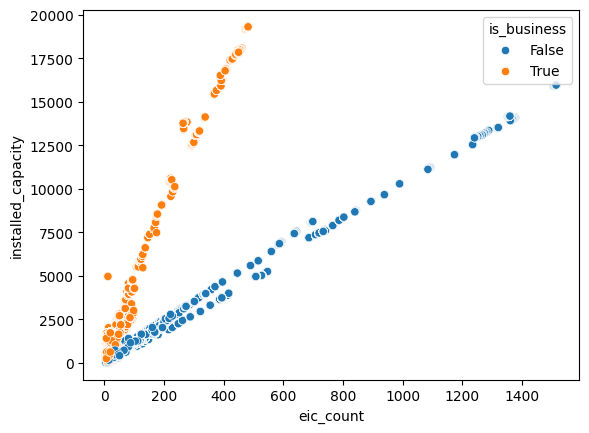

In [56]:
sns.scatterplot(
    data=df,
    x="eic_count",
    y='installed_capacity',
    hue="is_business",
)
plt.show()

In [58]:
df['capacity_per_eic_count'] = df['installed_capacity'] / df['eic_count']
df

,product_type,county,eic_count,installed_capacity,is_business,data_block_id,capacity_per_eic_count
date,,,,,,,
2021-09-01,1,0,108,952.89,False,2,8.823056
2021-09-01,2,0,17,166.40,False,2,9.788235
2021-09-01,3,0,688,7207.88,False,2,10.476570
2021-09-01,0,0,5,400.00,True,2,80.000000
2021-09-01,1,0,43,1411.00,True,2,32.813953
...,...,...,...,...,...,...,...
2023-05-29,1,15,51,415.60,False,637,8.149020
2023-05-29,3,15,161,2035.75,False,637,12.644410
2023-05-29,0,15,15,620.00,True,637,41.333333


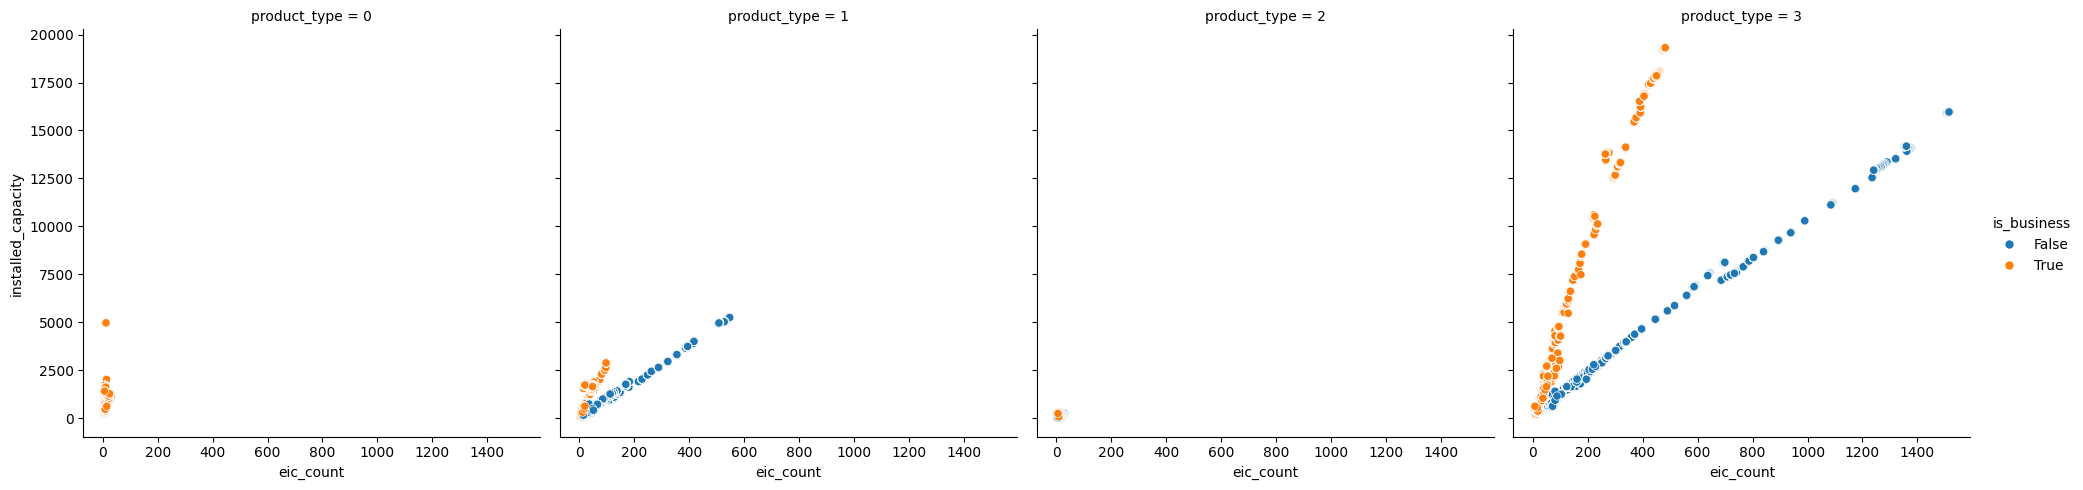

In [51]:
sns.relplot(
    data=df,
    x="eic_count",
    y="installed_capacity",
    col="product_type",
    hue="is_business",
)
# plt.xscale('log')
# plt.yscale("log")
plt.show()

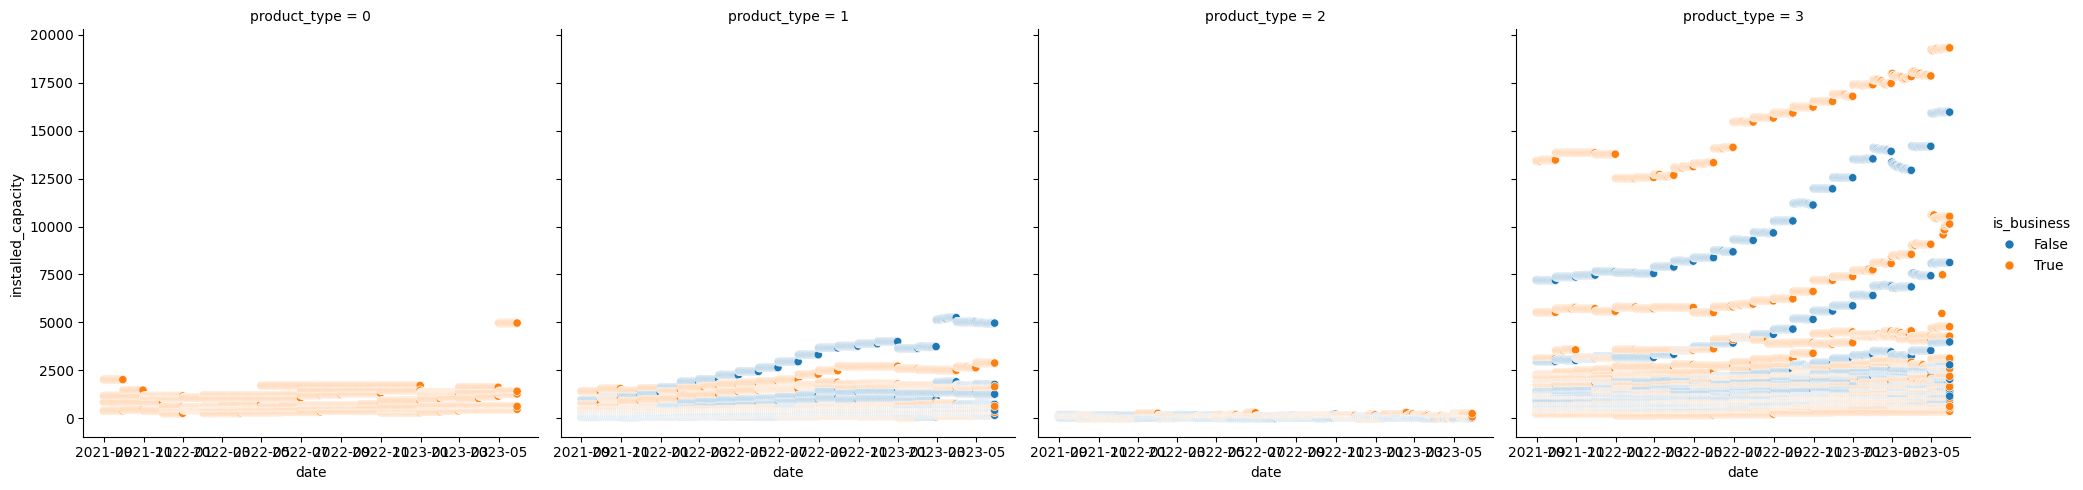

In [62]:
sns.relplot(
    data=df,
    x="date",
    y="installed_capacity",
    col="product_type",
    hue="is_business",
)
plt.show()

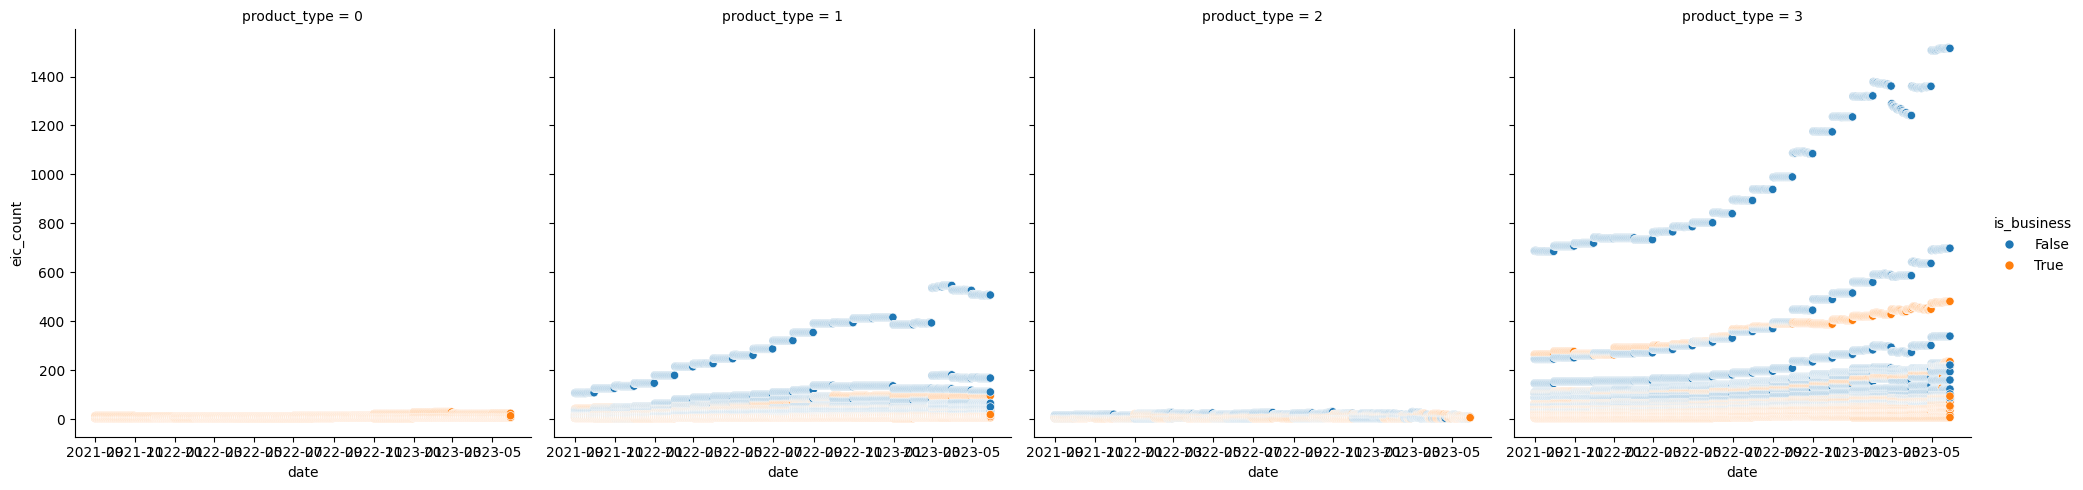

In [63]:
sns.relplot(
    data=df,
    x="date",
    y="eic_count",
    col="product_type",
    hue="is_business",
)
plt.show()

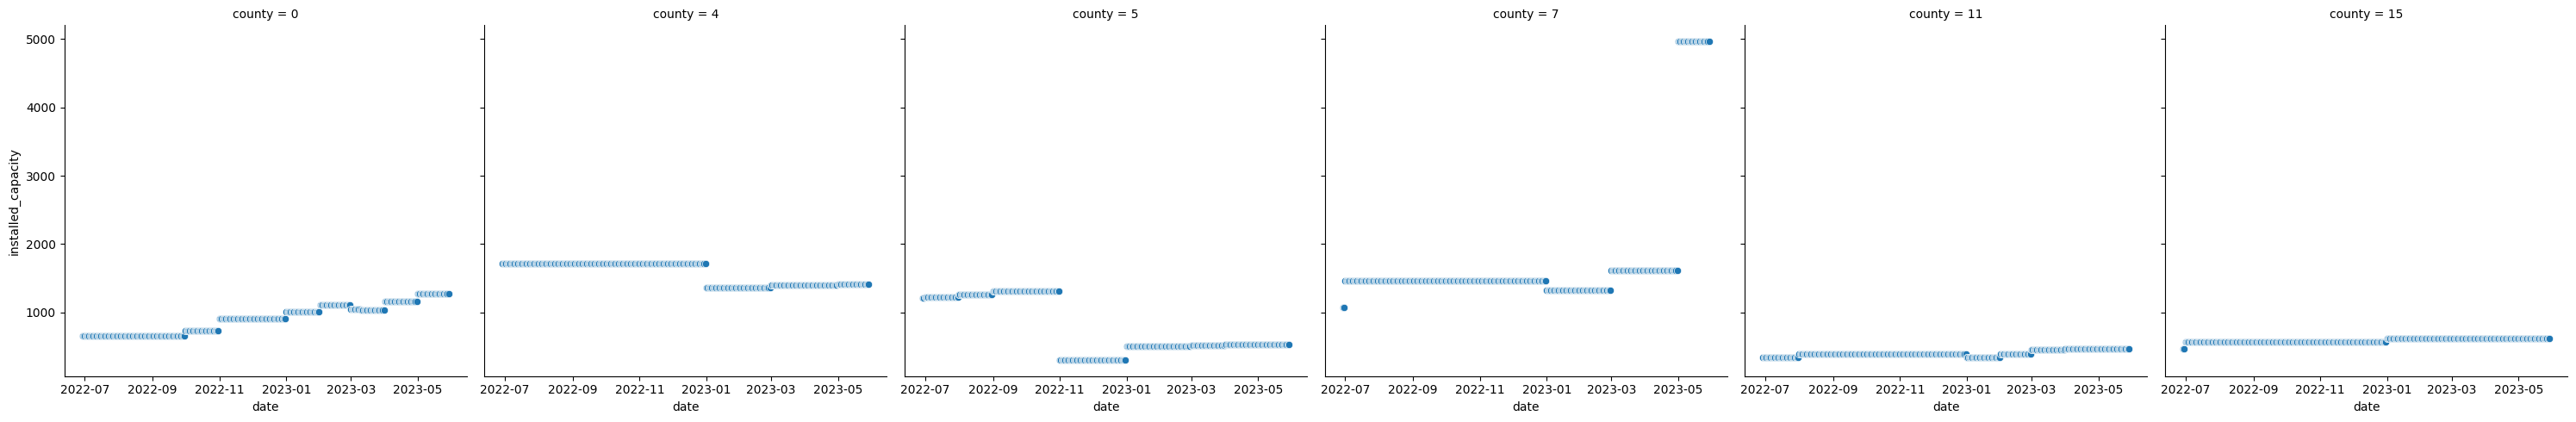

In [81]:
sns.relplot(
    data=df.query('date >= "2022-6-29" and product_type == 0 and is_business == True'),
    x="date",
    y="installed_capacity",
    col="county",
    # height = 10,
    # hue="is_business",
)
plt.show()

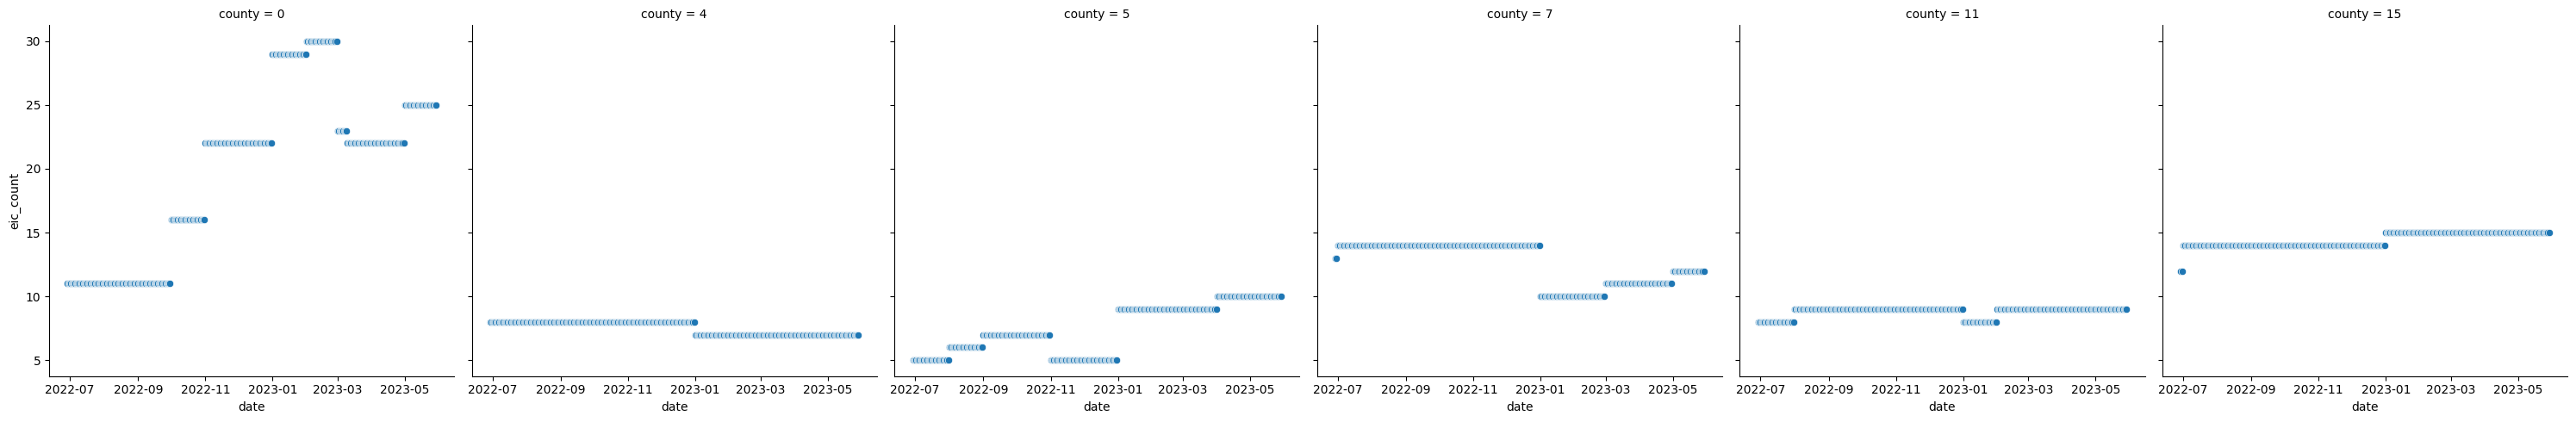

In [82]:
sns.relplot(
    data=df.query('date >= "2022-6-29" and product_type == 0 and is_business == True'),
    x="date",
    y="eic_count",
    col="county",
    # height = 10,
    # hue="is_business",
)
plt.show()

- **county - An ID code for the county. See county_id_to_name_map.json for the mapping of ID codes to county names.**
- **eic_count - The aggregated number of consumption points (EICs - European Identifier Code).**
- **installed_capacity - Installed photovoltaic solar panel capacity in kilowatts.**
- **is_business - Boolean for whether or not the prosumer is a business.**